# Micro Credit Defaulter Prediction

Description:MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
    This Dataset consists of data from Telecom Industry. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive
    innovation. Here our aim is to build a model to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. 
    In addition, the main objective of this project is to prepare a dataset that has necessary features to predict how likely a person would repay a balance loan. Correlation studies was also performed between some of the variables in final dataset to check if there existed any significant 
    relation between those features as this may help with selection of variables for machine learning model. 
    Here, the target feature is 'label' which indicates if Label ‘1’ means that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter
    

In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Getting the Dataset

In [4]:
df=pd.read_csv("Data file.csv")

In [5]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Here we can see that this dataset has 37 columns.

In [7]:
df.shape  #analysing number of rows & columns

(209593, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Dataset Analysis: Thus we can onserve that in this dataset there ae total 37 columns with 209593 rows. In which there are 3 object type features, 13 intezer type, 21 float type values.
We can also see that there are no missing values. We have also observed that column 'Unnamed: 0' is just a serial number thus not contributing in machine learning process so we can drop this column.

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)   #Dropping column 'Unnamed: 0'

In [10]:
df.isnull().sum()       #checking null values

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Thus, here we observed that there are no null values in this dataset.

In [11]:
df.describe(include='all')        #Statistical Analysis

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


Here we observed the statistical analysis of all numerical columns representing the mean, median, mode, min and max values.

In [12]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

As we can see that 'pcircle' have only 1 unique value of object type so we can drop it as it'll not participating much in model building. 

In [13]:
df.drop('pcircle',axis=1,inplace=True)

In [14]:
df.head(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
5,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,...,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,2016-07-02
6,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-07-05
7,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,...,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,2016-08-05
8,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,...,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,2016-06-15
9,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-06-08


# EDA

Univariant Analysis

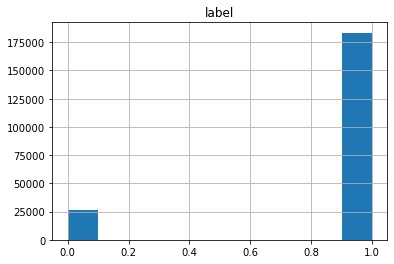

In [15]:
df['label'].hist(grid=True)
plt.title("label")
plt.show()

From above graph we observed that Label ‘1’ i.e. Non-Defaulter has approximately 87.5% records, while, label ‘0’ i.e.Defaulters has approximately 12.5% records.

<AxesSubplot:xlabel='pdate', ylabel='label'>

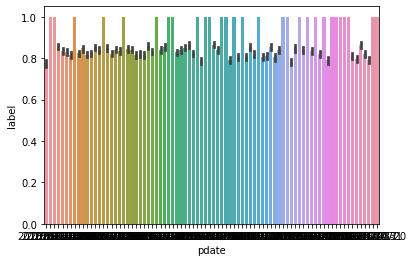

In [16]:
sns.barplot(x='pdate',y='label',data=df)

The above bivariant grapgh represents the relation between label and date.

In [17]:
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [18]:
count_balance_response_pct = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()
bal = pd.DataFrame(df['balance_group'].value_counts())

bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

In [19]:
#plotting the graph

(array([0, 1, 2, 3]),
 [Text(0, 0, 'average balance'),
  Text(1, 0, 'low balance'),
  Text(2, 0, 'no balance'),
  Text(3, 0, 'high balance')])

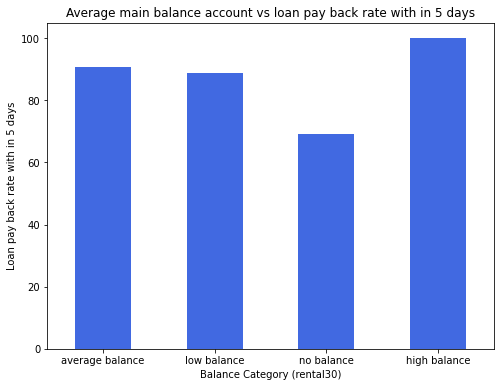

In [20]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

With above plot graph we observed that the high balance level people are 100% who are loan within 5 days. The people with average balance
and low balance are around 90% who are paying loan within 5 days and 10-12% who are paying the loan within 5 days. The people with no balance are around 30% who are not able to pay loan for whom company can take few measures such as
notifications, sms alerts etc. so that they can pay the loan.

Similarly we'll divide the loan values into different categories according to frequency of loan taken by user in last 30days and plot the graph with loan payback rate within 5 days.

In [21]:
lst = [df]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [22]:
count_loan_response_pct = pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()
fre = pd.DataFrame(df['loan_frequency_group'].value_counts())
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

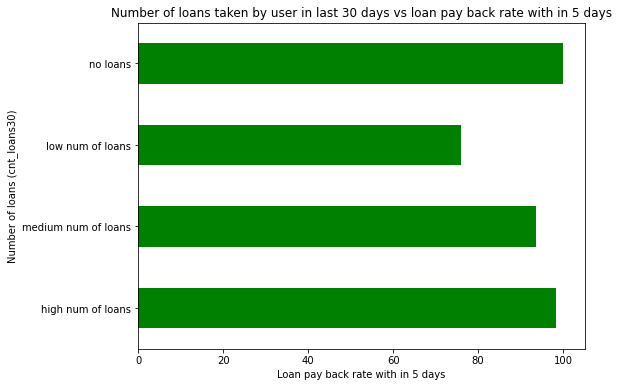

In [23]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('green'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

From above graph we are observing how the customers taken different loan levels are paying back within 5 days.
There is no 100% rate in any of the loan levels to pay back the loan within 5 days. With the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. 
Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.


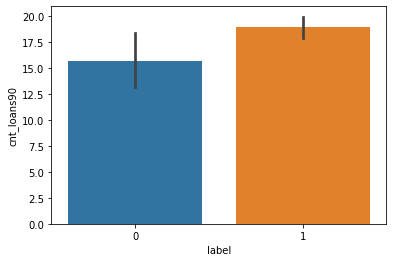

In [24]:
sns.barplot(data=df, x='label', y='cnt_loans90')
plt.show()

From above graph we observed that number of loan taken by users in last 90 days and who are defaulters are around 15times
while number of loan taken by users in last 90 days and who are not defaulters are around 20 times.

# Data Cleaning

As we observed that column 'msisdn','pdate','loan_frequency_group','balance_group' features are not much important so we can drop it
along with other created columns for EDA.

In [25]:
df.drop(['msisdn','pdate','balance_group','loan_frequency_group'],axis=1,inplace=True)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


# Checking Correlation

In [26]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


<AxesSubplot:>

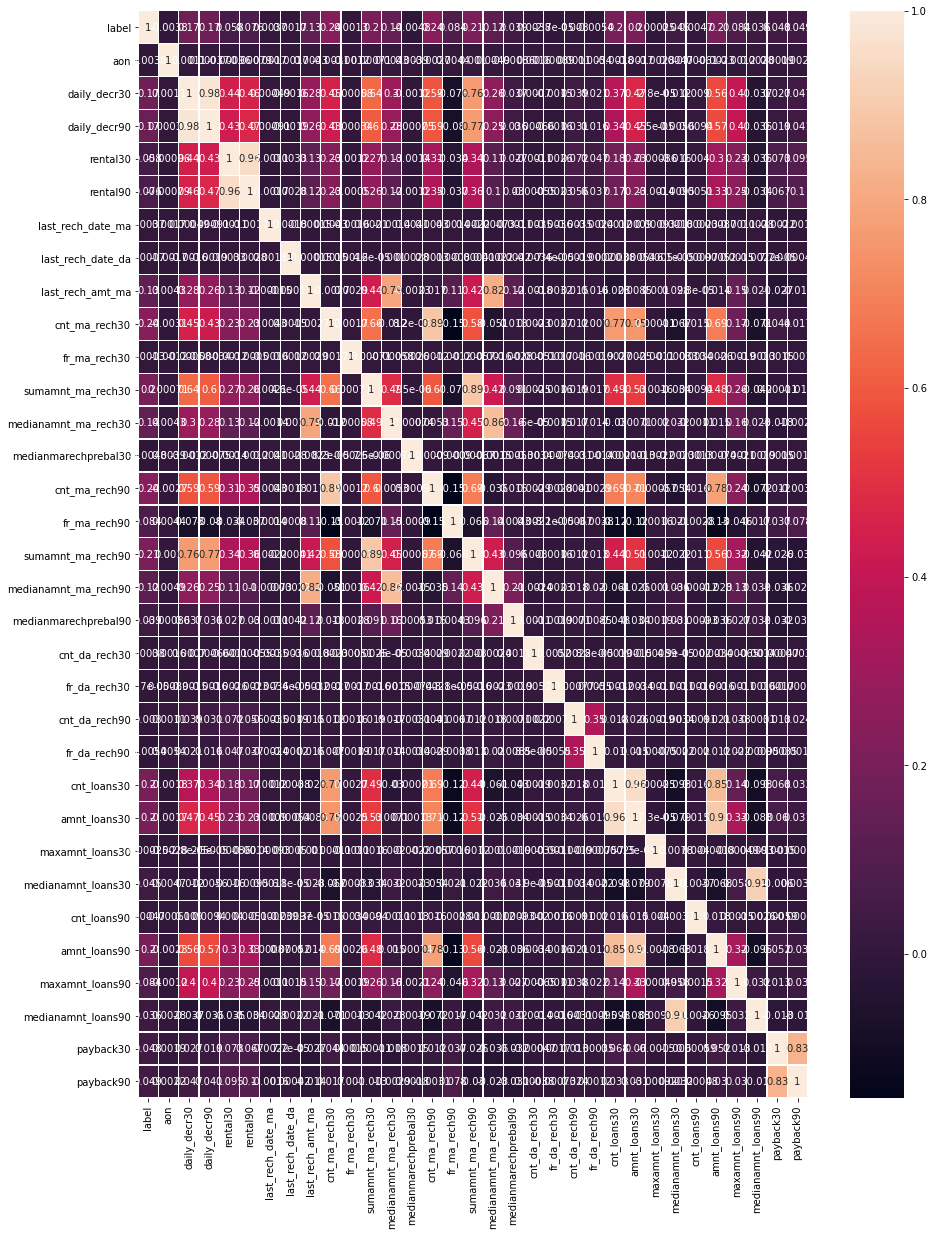

In [27]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.2)

From above correlation graph we observed that few of the features are positively correlated, few are negatively correlated and few 
features are not showing any correlation with target variable.

# Checking Outliers 

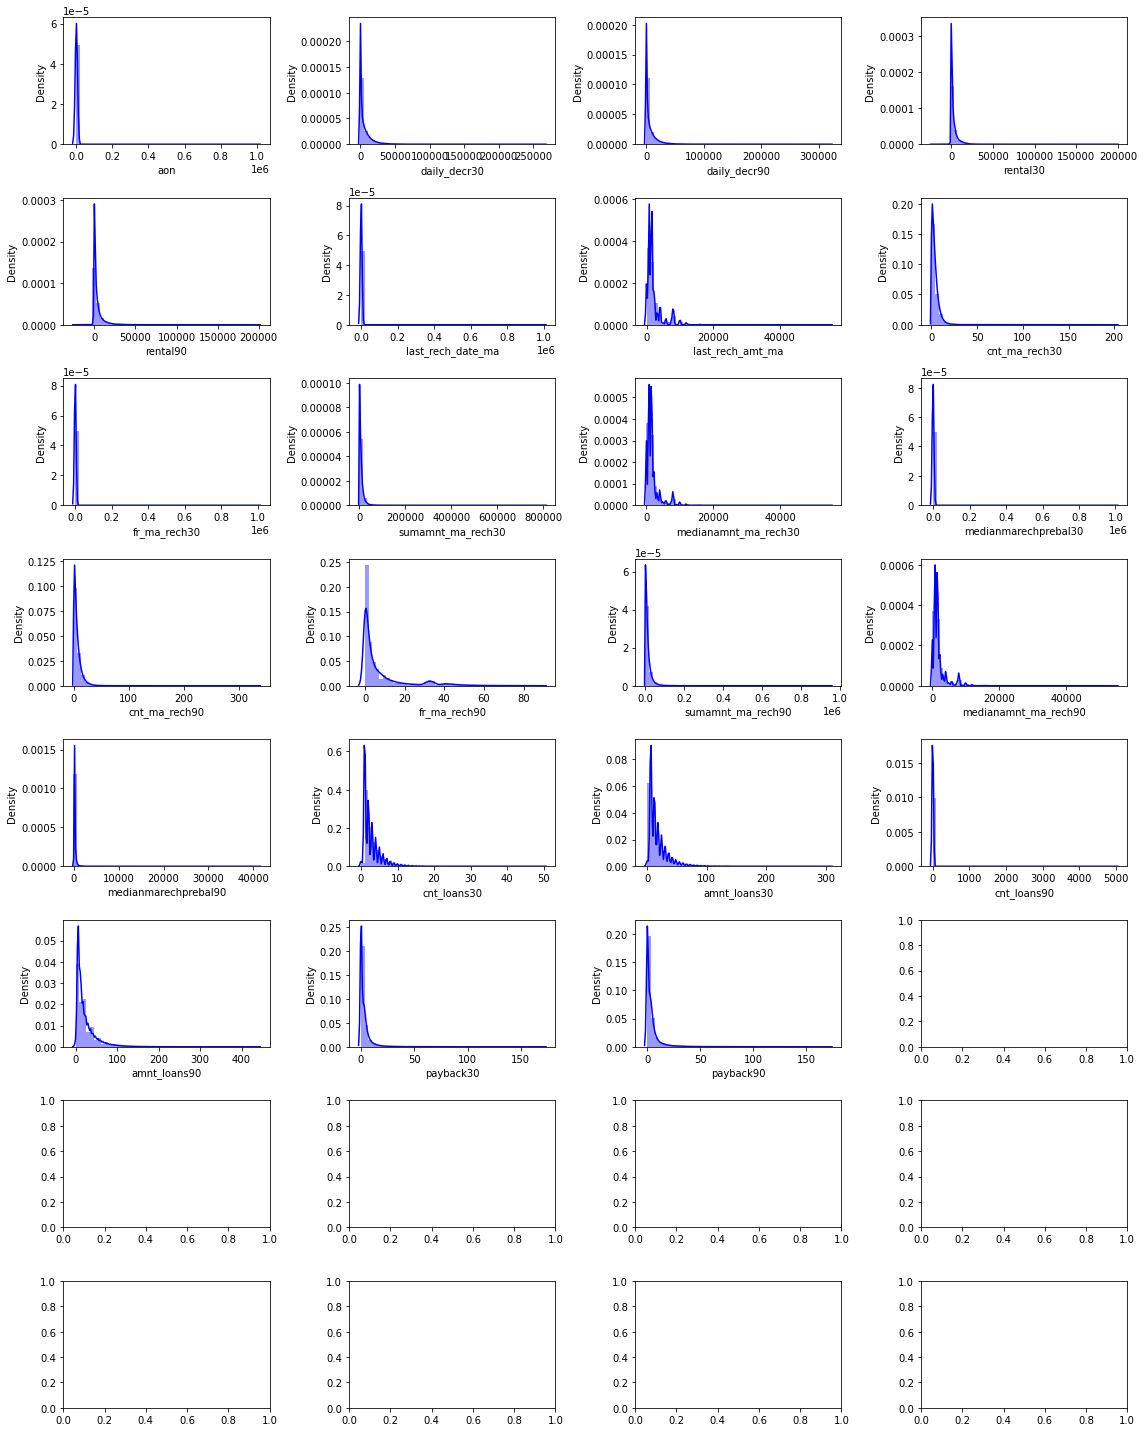

In [28]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,4,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i],color='blue')
plt.tight_layout()
plt.show()

from all above distributed graph, we have observed that most of the columns are right skewed.

Checking outliers by plotting boxplot of features.

<AxesSubplot:>

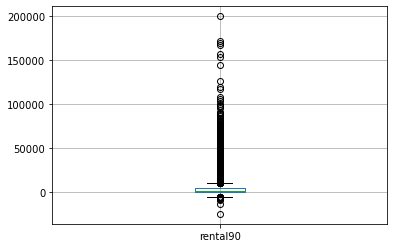

In [29]:
df.boxplot('rental90')

<AxesSubplot:>

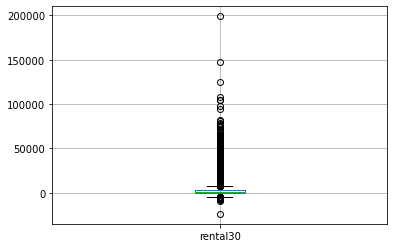

In [30]:
df.boxplot('rental30')

<AxesSubplot:>

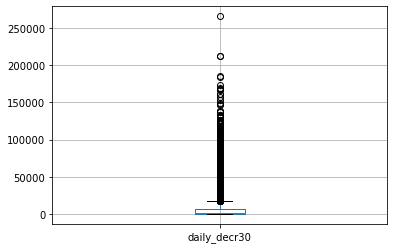

In [31]:
df.boxplot('daily_decr30')

<AxesSubplot:>

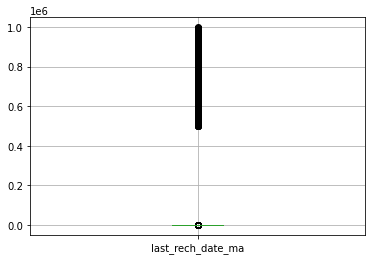

In [32]:
df.boxplot('last_rech_date_ma')

<AxesSubplot:>

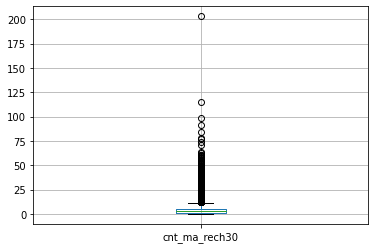

In [33]:
df.boxplot('cnt_ma_rech30')

<AxesSubplot:>

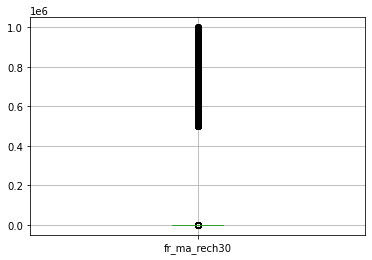

In [34]:
df.boxplot('fr_ma_rech30')

<AxesSubplot:>

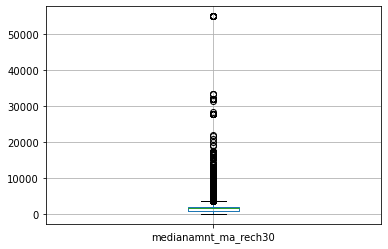

In [35]:
df.boxplot('medianamnt_ma_rech30')

<AxesSubplot:>

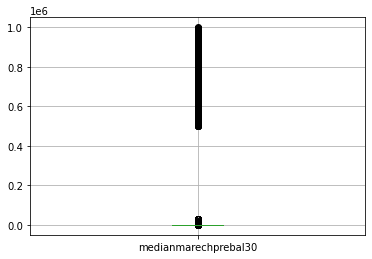

In [36]:
df.boxplot('medianmarechprebal30')

<AxesSubplot:>

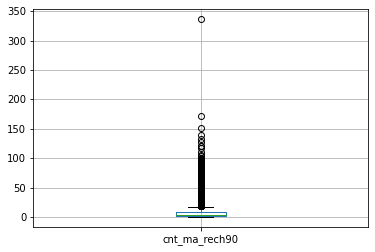

In [37]:
df.boxplot('cnt_ma_rech90')

<AxesSubplot:>

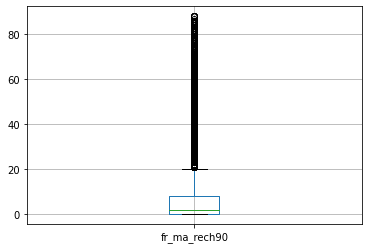

In [38]:
df.boxplot('fr_ma_rech90')

<AxesSubplot:>

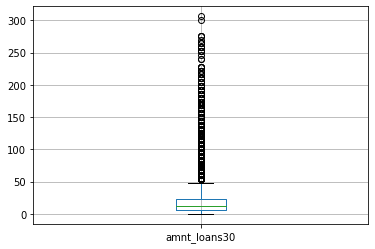

In [39]:
df.boxplot('amnt_loans30')

<AxesSubplot:>

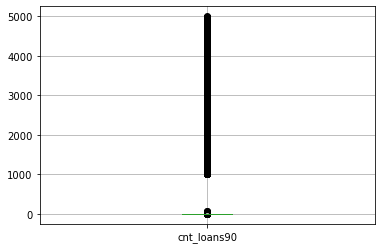

In [40]:
df.boxplot('cnt_loans90')

<AxesSubplot:>

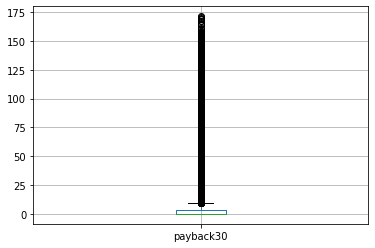

In [41]:
df.boxplot('payback30')

<AxesSubplot:>

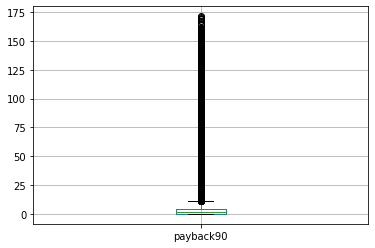

In [42]:
df.boxplot('payback90')

In [43]:
#Removing outliers

In [44]:
Column_Names=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']

In [45]:
 def remove_outliers(df):
        Column_Names=df.columns
        for j in Column_Names:
            print('Before Removing Outliers')

        ##visualisation of outliers
        a = sns.boxplot(data=df,df=df[j])
        plt.tight_layout() 
        plt.show()
        xy=x[j]    
        mydata=pd.DataFrame()

        updated=[]
        Q1,Q3=np.percentile(xy,[25,75])
        IQR=Q3-Q1
        minimum=Q1-1.5*IQR
        maximum=Q3+1.5*IQR
        for i in xy:
            if(i>maximum):
                i=maximum
                updated.append(i)
            elif(i<minimum):
                i=minimum
                updated.append(i)
            else:
                updated.append(i)
                x[j]=updated
        print('After Removing Outliers')

        ## visualising after removing outliers
        b= sns.boxplot(data=x,x=x[j])
        plt.tight_layout() 
        plt.show()
        return df                

In [46]:
# using the maximum and minimum values obtained from quartiles and inter-quartile range
# any outliers greater than maximum are updated to be equal to maximum
# any outliers lesser than minimum are updated to be equal to minimum
# thus here, no outliers have been removed to prevent loss of data

In [47]:
df.shape

(209593, 33)

# Data Normalization

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values

# Splitting in x and y

In [49]:
x=df.drop('label',axis=1)
y=df['label']

In [50]:
#test-train split
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Model Building

In [52]:
#Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [54]:
predictions = LR.predict(x_test) 

# print classification report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

#print cross validation score
from sklearn.model_selection import cross_val_score  
scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score:",scr.mean())

[[   36  7866]
 [   31 54945]]
              precision    recall  f1-score   support

         0.0       0.54      0.00      0.01      7902
         1.0       0.87      1.00      0.93     54976

    accuracy                           0.87     62878
   macro avg       0.71      0.50      0.47     62878
weighted avg       0.83      0.87      0.82     62878

cross validation score: 0.8752296117044489


In [55]:
#Confusion Matrix

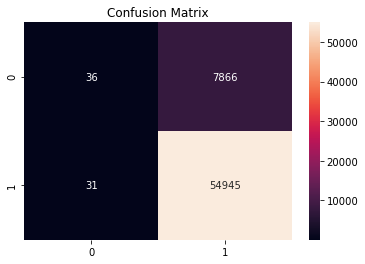

In [56]:
from sklearn.metrics import confusion_matrix
predictions = LR.predict(x_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [57]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8744075829383886
Precision = 0.8747671586187132
Recall = 0.9994361175785798
F1 Score = 0.9329552497304456


# AUC ROC Curve

ROC AUC = 0.8216117531252312


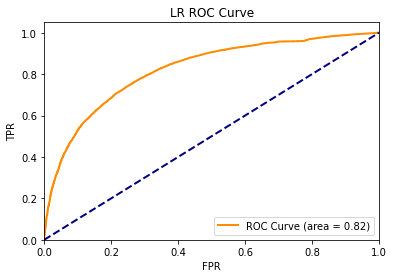

In [58]:
from sklearn.metrics import roc_curve,roc_auc_score
predictions = LR.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,predictions[:,1])
roc_auc = roc_auc_score(y_test,predictions[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LR ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
1. Logistic Regression - Accuracy 87%  |     F1score 93%     |     Cross validation 87%

From the above graph and Logistic Regression it is observed that all the metrics accuracy, precision, recall and f1-score are good. 
In order to improve the score very much high we'll also try with various other models such as decision tree, random forest, and ensemble models also.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_score

In [60]:
#Random Forest Classifier


In [61]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
predictions = RFC.predict(x_test)

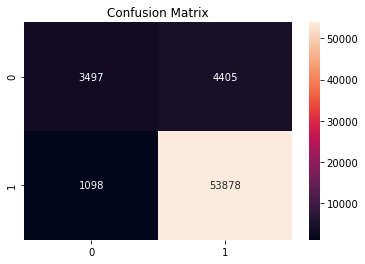

In [63]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [64]:
# Printing Classification Report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

#print cross validation score
scr=cross_val_score(RFC,x,y,cv=5)
print("cross validation score:",scr.mean())

              precision    recall  f1-score   support

         0.0       0.76      0.44      0.56      7902
         1.0       0.92      0.98      0.95     54976

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.76     62878
weighted avg       0.90      0.91      0.90     62878

[[ 3497  4405]
 [ 1098 53878]]
cross validation score: 0.9129551104525593


In [65]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9124813130188619
Precision = 0.9244204999742635
Recall = 0.9800276484284052
F1 Score = 0.951412249799133


# ROC Curve

ROC AUC = 0.8918079141927495


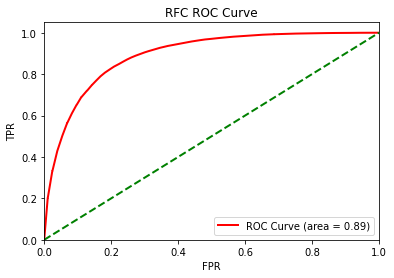

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
predictions = RFC.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,predictions[:,1])
roc_auc = roc_auc_score(y_test,predictions[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='green',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RFC ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
2. Random Forest Classifier - Accuracy 91%  |     F1score 95%     |     Cross validation 91%

# Decision Tree Classifier

In [67]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
predictions = DTC.predict(x_test)

In [69]:
predictions = DTC.predict(x_test) 
  
# print classification report 
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

#print cross validation score
scr=cross_val_score(DTC,x,y,cv=5)
print("cross validation score:",scr.mean())

[[ 3910  3992]
 [ 4382 50594]]
              precision    recall  f1-score   support

         0.0       0.47      0.49      0.48      7902
         1.0       0.93      0.92      0.92     54976

    accuracy                           0.87     62878
   macro avg       0.70      0.71      0.70     62878
weighted avg       0.87      0.87      0.87     62878

cross validation score: 0.8661644269858396


In [70]:
#Classification Matrix

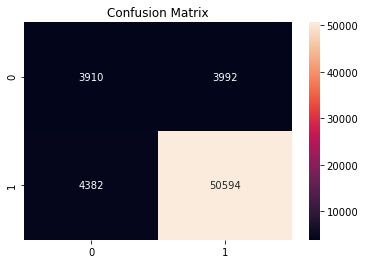

In [71]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [72]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8668214637870161
Precision = 0.9268676950133734
Recall = 0.9202924912689173
F1 Score = 0.923568390500356


ROC AUC = 0.7074774514707819


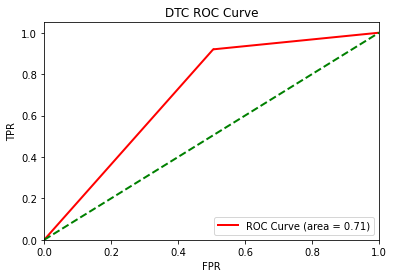

In [73]:
# ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
predictions = DTC.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,predictions[:,1])
roc_auc = roc_auc_score(y_test,predictions[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='green',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DTC ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
3. Decision Tree Classifier - Accuracy 87%  |     F1score 92%     |     Cross validation 87%

# Linear SVM

In [74]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [75]:
predictions = svclassifier.predict(x_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[    0  7902]
 [    0 54976]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7902
         1.0       0.87      1.00      0.93     54976

    accuracy                           0.87     62878
   macro avg       0.44      0.50      0.47     62878
weighted avg       0.76      0.87      0.82     62878



In [77]:
#print cross validation score
scr=cross_val_score(svclassifier,x,y,cv=5)
print("cross validation score:",scr.mean())

cross validation score: 0.8751771290811783


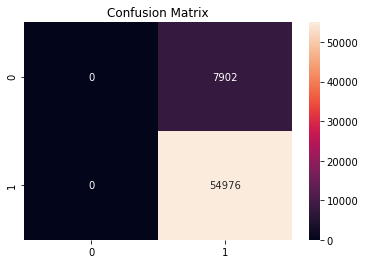

In [78]:
#Classification Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

In [79]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.874328063869716
Precision = 0.874328063869716
Recall = 1.0
F1 Score = 0.9329509392977752


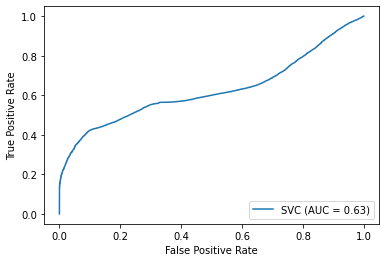

In [80]:
metrics.plot_roc_curve(svclassifier, x_test, y_test) 
plt.show()

In [ ]:
4. Linear SVM  - Accuracy 87%  |     F1score 93%     |     Cross validation 87%

# Gradient Boost Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predictions=GBC.predict(x_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 2901  5001]
 [  883 54093]]
              precision    recall  f1-score   support

         0.0       0.77      0.37      0.50      7902
         1.0       0.92      0.98      0.95     54976

    accuracy                           0.91     62878
   macro avg       0.84      0.68      0.72     62878
weighted avg       0.90      0.91      0.89     62878



In [83]:
#print cross validation score
scr=cross_val_score(GBC,x,y,cv=5)
print("cross validation score:",scr.mean())

cross validation score: 0.9059796827614125


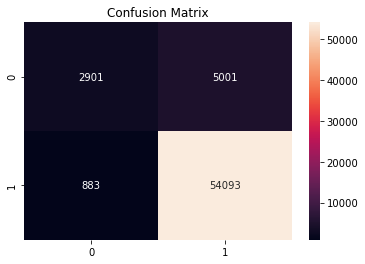

In [84]:
#Classification Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

In [85]:
accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.9064219599860046
Precision = 0.9153721189968524
Recall = 0.9839384458672875
F1 Score = 0.9484176382922765


ROC AUC = 0.8795950218280748


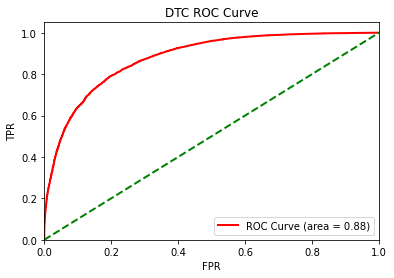

In [86]:
# ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
predictions = GBC.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,predictions[:,1])
roc_auc = roc_auc_score(y_test,predictions[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='green',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DTC ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
5. Gradient Boost Classifier  - Accuracy 90%  |     F1score 94%     |     Cross validation 90%

# Hyper Parameter Tuning

In [87]:
#Applying Randomized SearchCV Random Forest Classifier Model

In [88]:
from sklearn.model_selection import RandomizedSearchCV
parameters={"n_estimators":[100,200,300,400,500,600,700,800],"criterion":['gini']
           ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18],
           "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}
rdm_rf=RandomizedSearchCV(RFC,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=5,verbose=2)
rdm_rf.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 48.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [89]:
rdm_rf.best_estimator_

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

In [90]:
rdm_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

In [91]:
print("accuracy :",rdm_rf.best_score_)

accuracy : 0.9142418975564871


In [ ]:
Conclusion: Considering all evaluation and performance metrics, Random Forest is getting the highest accuracy.
We came to confirmation that Random Forest is best fit model by performing hyper parameter tuning on it which gives same accuracy of 91-92%.
The result of this problem is random forest classifier as it meets the best accuracy  and all
               performce metrics. 

